# Breast cancer diagonosis: use machine learning to predict breast cancer being malignant or benign--by Xiao Yin

In this project, I will use machine learning to build models that can tell accurately whether a cancer is malignant or benign. The report is organized as follows:
I will start with loading and preprocessing the dataset. I then build 6 Supervised models on this dataset. During this process, I will first apply default model with no tuning of the parameters, and then tuned them with different parameter values. I'll plot ROC curve to select the best machine learning model. The models used are as follows:

**1)Logistic Regression**

 **2)Gaussian Naive Bayes**
 
  **3)Support Vector Machine**
  
  **4)Random Forest Classifier** 
  
  **5)Decision trees**
  
   **6)Simple neural network**
   
  For each section, I list the required goal beneath the section title.

In [502]:
import matplotlib
matplotlib.matplotlib_fname()
plt.ion()

# Python Coding and Data Set

**GOAL**:

Load in the data file and header file provided

The dataframe does not currently have a header, load in the header file and attach it to the dataframe
Comment on any steps you might take to evaluate or transform the dataset.

Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

Write a function to generate bootstrap samples of the data.




###  Importing all the libraries

In [380]:
import pandas as pd
import numpy as np
import sklearn as sklearn
#from matplotlib import pyplot as plt
import seaborn as sns

### Reading the file 

In [410]:
data = pd.read_csv("/Users/xiaoyin/Downloads/breast-cancer.csv",index_col=0,header=None)
data.head(6)
data = data.reset_index()
data.head(6)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [411]:
data.columns = ["ID",
"diagnosis",
"radius_mean",
"radius_sd_error",
"radius_worst",
"texture_mean",
"texture_sd_error",
"texture_worst",
"perimeter_mean",
"perimeter_sd_error",
"perimeter_worst",
"area_mean",
"area_sd_error",
"area_worst",
"smoothness_mean",
"smoothness_sd_error",
"smoothness_worst",
"compactness_mean",
"compactness_sd_error",
"compactness_worst",
"concavity_mean",
"concavity_sd_error",
"concavity_worst",
"concave_points_mean",
"concave_points_sd_error",
"concave_points_worst",
"symmetry_mean",
"symmetry_sd_error",
"symmetry_worst",
"fractal_dimension_mean",
"fractal_dimension_sd_error",
"fractal_dimension_worst"]
data.head(6)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


** Let us check if there is any null values**

In [412]:
data.isnull().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

In [413]:
data = data.drop('ID', 1)


In [414]:
data.shape
data.head(6)


,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [415]:
data['diagnosis'].unique()


array(['M', 'B'], dtype=object)

**Thus we have two classification. Either the cell is malignant(M) or benign(B)**

In [416]:
data.shape

(569, 31)

**Thus we have 30 features(1st one is label)  and 569 instances.Now let us check which features constitutes maximum information.** 

**We can see that the dataset has values in strings (the label).We need to convert all the unique values to integers. Thus we perform label encoding on the data.** 

In [417]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,370,1,455,452,444,531,521,526,416,...,425,41,497,516,358,516,520,483,485,506
1,1,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
2,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
3,1,98,297,164,95,471,533,507,493,426,...,215,298,281,194,408,524,511,479,499,533
4,1,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216


In [418]:
data.head(6)


,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,370,1,455,452,444,531,521,526,416,...,425,41,497,516,358,516,520,483,485,506
1,1,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
2,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
3,1,98,297,164,95,471,533,507,493,426,...,215,298,281,194,408,524,511,479,499,533
4,1,418,60,493,506,332,414,480,492,216,...,381,28,453,470,239,245,415,363,81,216
5,1,159,107,223,200,463,477,440,423,355,...,238,206,309,308,394,492,472,380,466,516


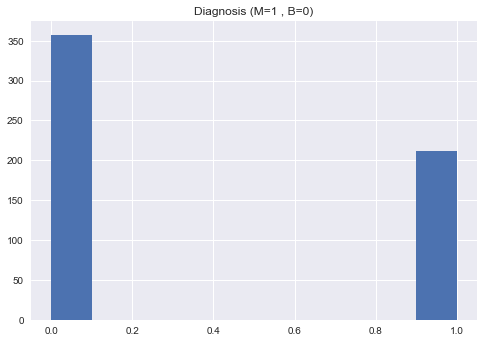

In [419]:
data.describe()
plt.hist(data['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

### Plotting boxplot to see the distribution of the data

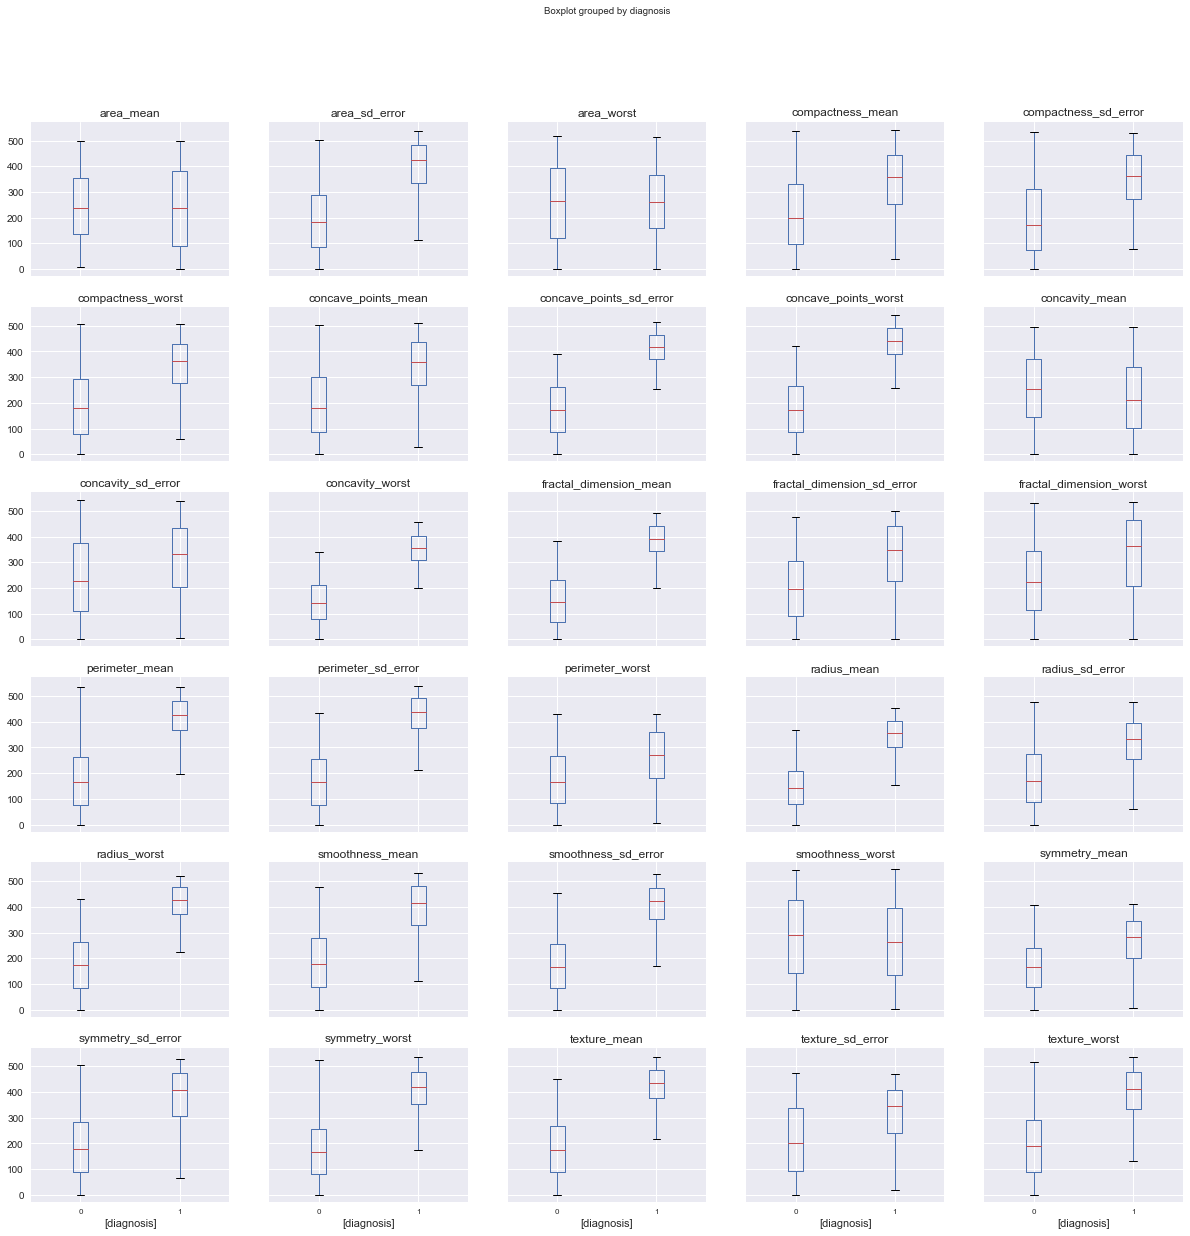

In [420]:
data.boxplot(by = 'diagnosis', figsize = (20, 20))
plt.show()

## Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

In [421]:
dataM.describe()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.0,340.716981,316.169811,410.806604,416.089623,318.919811,392.636792,413.764151,425.962264,261.358491,...,350.801887,342.731132,412.589623,431.471698,266.650943,381.141509,408.160377,383.518868,321.193396,330.891509
std,0.0,82.788230,103.998494,85.707512,94.864465,110.484878,110.971518,88.910472,81.891088,110.435260,...,68.117465,113.496846,67.382170,78.018798,96.520267,113.583419,89.736754,74.806763,135.839379,154.481099
min,1.0,73.000000,1.000000,96.000000,76.000000,19.000000,44.000000,95.000000,127.000000,7.000000,...,110.000000,28.000000,151.000000,128.000000,7.000000,7.000000,24.000000,23.000000,0.000000,0.000000
25%,1.0,299.750000,254.750000,373.500000,376.750000,239.000000,334.500000,366.750000,375.000000,181.750000,...,309.000000,269.250000,370.750000,388.750000,199.250000,306.750000,353.750000,342.750000,227.500000,208.250000
50%,1.0,356.500000,333.000000,428.000000,436.500000,346.000000,413.000000,427.500000,438.500000,270.500000,...,357.500000,360.000000,418.500000,441.500000,281.500000,408.500000,420.000000,392.000000,347.000000,361.500000
75%,1.0,404.000000,396.500000,477.250000,487.250000,409.250000,478.250000,482.250000,491.250000,360.500000,...,404.250000,438.250000,466.000000,491.250000,344.250000,473.250000,478.250000,440.250000,441.250000,464.250000
max,1.0,455.000000,478.000000,521.000000,538.000000,472.000000,536.000000,536.000000,541.000000,431.000000,...,456.000000,510.000000,513.000000,543.000000,410.000000,528.000000,537.000000,491.000000,499.000000,534.000000


In [422]:
dataB.describe()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,147.655462,189.756303,177.677871,181.319328,214.061625,199.703081,174.232493,168.980392,179.661064,...,144.165266,200.294118,174.184874,177.249300,169.915966,191.484594,178.742297,151.252101,204.453782,232.098039
std,0.0,85.145161,126.513465,108.266576,110.529110,135.189013,129.204877,117.655273,109.261577,112.172845,...,81.401889,135.230807,102.284245,106.671432,100.814568,123.675513,123.110692,98.376503,126.980606,141.265922
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.0,78.000000,88.000000,84.000000,87.000000,92.000000,89.000000,74.000000,77.000000,85.000000,...,78.000000,88.000000,87.000000,86.000000,87.000000,88.000000,79.000000,67.000000,92.000000,113.000000
50%,0.0,144.000000,171.000000,175.000000,176.000000,200.000000,191.000000,166.000000,164.000000,165.000000,...,141.000000,179.000000,171.000000,172.000000,167.000000,178.000000,167.000000,146.000000,197.000000,224.000000
75%,0.0,209.000000,273.000000,264.000000,268.000000,336.000000,292.000000,262.000000,254.000000,266.000000,...,210.000000,299.000000,260.000000,264.000000,240.000000,284.000000,258.000000,233.000000,305.000000,345.000000
max,0.0,366.000000,477.000000,431.000000,449.000000,473.000000,518.000000,534.000000,435.000000,429.000000,...,342.000000,504.000000,392.000000,421.000000,407.000000,504.000000,538.000000,381.000000,478.000000,532.000000


In [423]:
dataB['smoothness_mean'].describe()

count    357.000000
mean     188.815126
std      120.866346
min        0.000000
25%       87.000000
50%      177.000000
75%      278.000000
max      476.000000
Name: smoothness_mean, dtype: float64

In [424]:
dataM['smoothness_mean'].describe() 

count    212.000000
mean     387.806604
std      113.057446
min       60.000000
25%      330.250000
50%      413.500000
75%      480.250000
max      532.000000
Name: smoothness_mean, dtype: float64

In [425]:
dataM['compactness_mean'].describe() 


count    212.000000
mean     343.033019
std      128.574296
min       40.000000
25%      253.000000
50%      359.500000
75%      445.250000
max      540.000000
Name: compactness_mean, dtype: float64

In [426]:
dataB['compactness_mean'].describe() 


count    357.000000
mean     221.952381
std      150.883672
min        0.000000
25%       98.000000
50%      199.000000
75%      333.000000
max      539.000000
Name: compactness_mean, dtype: float64

**Thus we see there are clear differences on the mean and median smoothness and compactness for benign and malignant tumors. This indicates they are good features for differentiating the benign from the malignant cancer**

**Separating features and label**

In [427]:
X = data.iloc[:,1:31]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [428]:
X.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,219.586995,236.855888,264.537786,268.790861,253.130053,271.586995,263.478032,264.727592,210.100176,243.277680,...,221.154657,253.363796,263.010545,271.968366,205.957821,262.147627,264.219684,237.790861,247.949033,268.906854
std,125.770848,133.385694,151.005745,154.619229,136.250342,154.125189,158.267635,159.494408,118.236672,140.849973,...,125.999108,144.907096,146.811822,156.612745,109.645933,151.004941,157.531181,144.145369,141.957663,153.812855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118.000000,125.000000,134.000000,136.000000,136.000000,138.000000,126.000000,127.000000,110.000000,125.000000,...,116.000000,131.000000,138.000000,136.000000,116.000000,134.000000,130.000000,112.000000,126.000000,136.000000
50%,209.000000,235.000000,266.000000,268.000000,265.000000,277.000000,265.000000,263.000000,205.000000,236.000000,...,218.000000,254.000000,271.000000,275.000000,204.000000,259.000000,265.000000,242.000000,251.000000,269.000000
75%,322.000000,347.000000,396.000000,401.000000,373.000000,403.000000,398.000000,402.000000,306.000000,364.000000,...,326.000000,376.000000,387.000000,408.000000,295.000000,393.000000,401.000000,362.000000,369.000000,400.000000
max,455.000000,478.000000,521.000000,538.000000,473.000000,536.000000,536.000000,541.000000,431.000000,498.000000,...,456.000000,510.000000,513.000000,543.000000,410.000000,528.000000,538.000000,491.000000,499.000000,534.000000


In [429]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [430]:
data.corr()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,1.000000,0.742827,0.458623,0.747092,0.734770,0.372423,0.605768,0.732390,0.779702,0.334370,...,0.793618,0.475669,0.785825,0.785522,0.426936,0.607784,0.704746,0.779755,0.397952,0.310819
radius_mean,0.742827,1.000000,0.345239,0.995636,0.998156,0.160984,0.503571,0.653984,0.768864,0.128979,...,0.978884,0.318047,0.969468,0.977448,0.133004,0.492684,0.600307,0.732001,0.177525,0.046240
radius_sd_error,0.458623,0.345239,1.000000,0.345625,0.342979,0.021744,0.262162,0.339786,0.305719,0.109644,...,0.368990,0.909716,0.368970,0.365995,0.099222,0.289511,0.336786,0.315397,0.117986,0.114304
radius_worst,0.747092,0.995636,0.345625,1.000000,0.996984,0.183623,0.541462,0.679614,0.788028,0.148716,...,0.980044,0.321515,0.979124,0.981099,0.155454,0.534041,0.631062,0.755436,0.199524,0.087578
texture_mean,0.734770,0.998156,0.342979,0.996984,1.000000,0.141610,0.488167,0.642225,0.756440,0.114283,...,0.978752,0.317042,0.971694,0.980467,0.119888,0.485374,0.593589,0.722511,0.171499,0.038061
texture_sd_error,0.372423,0.160984,0.021744,0.183623,0.141610,1.000000,0.678077,0.517615,0.567139,0.533066,...,0.210766,0.060254,0.221997,0.192574,0.800043,0.482157,0.430257,0.500685,0.389136,0.507820
texture_worst,0.605768,0.503571,0.262162,0.541462,0.488167,0.678077,1.000000,0.896145,0.848325,0.550616,...,0.544721,0.253131,0.585344,0.528761,0.583053,0.900967,0.837517,0.824822,0.448559,0.687206
perimeter_mean,0.732390,0.653984,0.339786,0.679614,0.642225,0.517615,0.896145,1.000000,0.927381,0.448624,...,0.686228,0.334521,0.714769,0.674262,0.490080,0.849735,0.938586,0.904064,0.384047,0.541612
perimeter_sd_error,0.779702,0.768864,0.305719,0.788028,0.756440,0.567139,0.848325,0.927381,1.000000,0.426771,...,0.792950,0.300847,0.809138,0.780010,0.493074,0.758364,0.827513,0.936857,0.357440,0.420894
perimeter_worst,0.334370,0.128979,0.109644,0.148716,0.114283,0.533066,0.550616,0.448624,0.426771,1.000000,...,0.169005,0.119146,0.183739,0.153367,0.426998,0.444953,0.396517,0.399128,0.711928,0.412329


## Bootstrap sampling

In [431]:
np.random.seed(123)

In [432]:
data.iloc[np.random.choice(4, 5)]

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
2,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
1,1,426,186,486,513,120,215,321,396,219,...,419,199,465,511,158,210,278,401,222,375
2,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
2,1,406,324,478,487,403,459,478,516,348,...,399,261,455,491,287,464,438,468,445,361
0,1,370,1,455,452,444,531,521,526,416,...,425,41,497,516,358,516,520,483,485,506


** In python, the default sampling is done with replacement. Thus we see the 2 index row appears tree times. This means this sampling is bootstrap. For further analysis with bootstrap, we can reorder the index (index.reset()) like we did above**

# Exploratory Analysis: 

Identify 2-3 variables that are predictive of a malignant tumor.
Display the relationship visually and write 1-2 sentences explaining the relationship.


**To achieve the above goal, I will use Principle Component Analysis (PCA)**

### Standardising the data

In [129]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.1969813 , -1.76978062,  1.26240099, ...,  1.70262075,
         1.67134019,  1.54279538],
       [ 1.64262729, -0.38160491,  1.46787182, ...,  1.13325004,
        -0.18295501,  0.69036165],
       [ 1.483468  ,  0.65389914,  1.41484709, ...,  1.59846757,
         1.3893181 ,  0.59926186],
       ..., 
       [ 0.95824237,  1.65938857,  0.96413687, ...,  0.54999224,
        -1.46615549, -0.16207208],
       [ 1.66650118,  1.72692145,  1.5606651 , ...,  1.69567721,
         1.57968301,  1.5948524 ],
       [-1.72359153,  1.32922786, -1.74675256, ..., -1.6511116 ,
         0.16957259, -0.96244879]])

### Principal Component Analysis

In [312]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[  6.88657939e+00,   1.70526423e+00,  -1.36646507e+00, ...,
          5.08565992e-03,   1.63430486e-02,  -1.24956636e-02],
       [  2.64703036e+00,  -3.64670128e+00,  -4.07457749e-01, ...,
          4.00842841e-02,   5.30358262e-04,   1.54706715e-02],
       [  6.09866838e+00,  -3.70473967e-01,  -2.67449603e-01, ...,
         -2.73170543e-02,  -1.19927379e-02,   2.73674367e-02],
       ..., 
       [  2.82630762e+00,  -2.33321492e+00,   1.54239106e+00, ...,
         -5.27155563e-02,   2.22813512e-03,   1.03594110e-02],
       [  7.85150737e+00,   1.25362940e+00,   4.28554204e-01, ...,
          9.94608284e-02,   1.91758765e-02,   1.19235181e-03],
       [ -6.15720726e+00,   1.29883290e-01,   2.97806057e+00, ...,
         -9.26968034e-02,  -6.35520260e-03,   2.79644348e-02]])

In [131]:
covariance=pca.get_covariance()
#covariance

In [313]:
explained_variance=pca.explained_variance_
explained_variance

array([  1.39731372e+01,   5.60542650e+00,   2.83816668e+00,
         1.81035726e+00,   1.57102584e+00,   1.14314837e+00,
         6.75866892e-01,   4.56061539e-01,   4.20850123e-01,
         3.08265359e-01,   2.66662710e-01,   2.25104067e-01,
         1.68889597e-01,   1.32352266e-01,   9.19071517e-02,
         5.47436364e-02,   4.55025294e-02,   4.23926465e-02,
         3.76439368e-02,   3.00931126e-02,   2.89511148e-02,
         1.90456658e-02,   1.81291131e-02,   1.20506234e-02,
         1.13927308e-02,   6.17362920e-03,   3.58013679e-03,
         2.08324744e-03,   6.91557860e-04,   3.04778864e-04])

In [167]:
sum(explained_variance)

30.0

In [324]:
pca.fit_transform(X)

array([[  6.88657939e+00,   1.70526423e+00,  -1.36646507e+00, ...,
          5.08565992e-03,   1.63430486e-02,  -1.24956636e-02],
       [  2.64703036e+00,  -3.64670128e+00,  -4.07457749e-01, ...,
          4.00842841e-02,   5.30358262e-04,   1.54706715e-02],
       [  6.09866838e+00,  -3.70473967e-01,  -2.67449603e-01, ...,
         -2.73170543e-02,  -1.19927379e-02,   2.73674367e-02],
       ..., 
       [  2.82630762e+00,  -2.33321492e+00,   1.54239106e+00, ...,
         -5.27155563e-02,   2.22813512e-03,   1.03594110e-02],
       [  7.85150737e+00,   1.25362940e+00,   4.28554204e-01, ...,
          9.94608284e-02,   1.91758765e-02,   1.19235181e-03],
       [ -6.15720726e+00,   1.29883290e-01,   2.97806057e+00, ...,
         -9.26968034e-02,  -6.35520260e-03,   2.79644348e-02]])

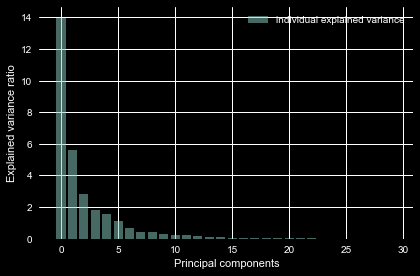

In [163]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(30), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

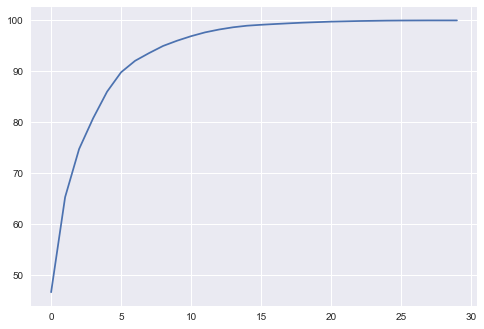

In [316]:

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [177]:
sum(explained_variance[0:7])/sum(explained_variance)

0.9205709575444716

**We can see that the second half (15-30) of components has very few amount of variance of the data.The 1st 8 components retains more than 90% of the data. Especially, the first component explains almost 50% and the second explains 18%.**

### Let us take only first two principal components and visualise it using K-means clustering

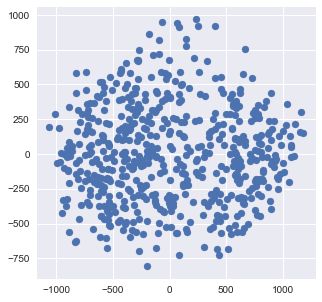

In [178]:
N=data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

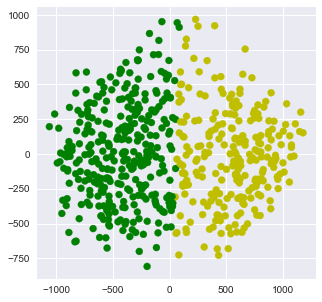

In [179]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

** Thus using K-means we are able segregate 2 classes well using the first two components with maximum variance.**

# Modeling:

**GOAL**:

Build a model to predict the malignant tumors.

Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
Identify how you would control for overfitting in each classification technique.

Evaluate the performance of each model.
In each model, identify the most important predictive variables and explain how you identified them.

In [434]:
X = data.iloc[:,1:31]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X_test

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
340,266,137,331,334,288,354,306,297,279,314,...,280,142,344,362,192,392,391,315,327,364
382,137,380,183,167,7,327,304,233,2,374,...,97,355,177,115,6,383,321,264,36,415
300,402,238,475,491,429,463,497,496,205,346,...,432,285,486,519,311,450,494,417,299,446
262,355,362,429,438,186,389,341,407,363,39,...,354,317,418,438,102,351,267,343,337,184
363,339,209,404,418,276,244,256,320,49,70,...,318,256,366,398,216,176,199,213,88,43
157,345,260,411,423,24,177,233,204,238,14,...,319,341,373,403,5,179,225,191,136,11
120,97,3,109,117,234,149,155,187,138,220,...,108,17,133,131,338,297,252,209,317,343
139,88,39,103,93,435,351,215,317,194,206,...,70,14,79,75,236,202,96,201,24,82
99,266,274,337,335,289,355,336,356,260,306,...,269,398,336,346,279,365,345,353,207,416
68,17,168,16,19,382,427,523,303,365,486,...,24,173,20,23,306,469,538,381,478,502


## Default Logistic Regression

In [435]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [436]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [437]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [438]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[72,  8],
       [ 3, 31]])

In [439]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.90588235294117636

In [440]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.98235294117647065

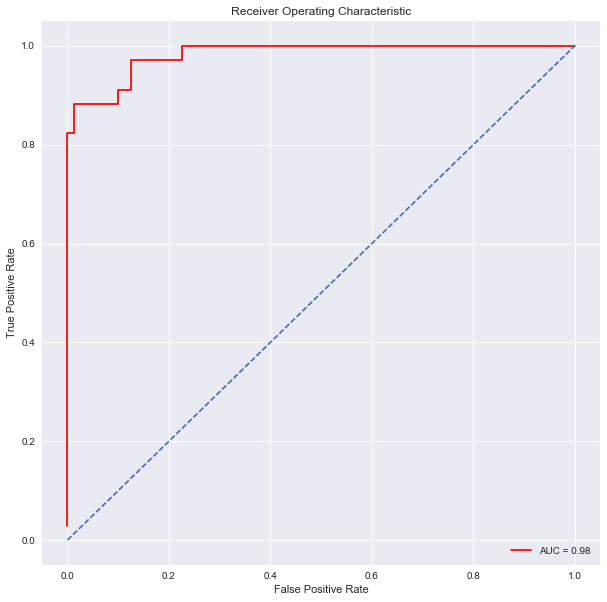

In [441]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [484]:
print(model_LR.coef_)


[[ 0.05605082  0.00431422  0.23769202 -0.28966653 -0.00548256 -0.01187003
   0.035423    0.01386751 -0.01107403 -0.01108314 -0.05415637 -0.01469365
   0.03289642  0.05758037 -0.00379744 -0.00423706 -0.01001539  0.00416259
  -0.01589113  0.00773819  0.16349487  0.0132509  -0.14093806 -0.01183473
   0.00646781 -0.00553394  0.00369692 -0.01041864  0.02294344 -0.00821987]]


**Easy to see the 3rd and 4th feature ("radius_mean" and "radius_sd_error") play the most important role.**

### Default Decision Tree model

In [459]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [460]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [461]:
y_prob = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_tree.score(X_test, y_pred)

1.0

In [462]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[67, 13],
       [ 0, 34]])

In [463]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      0.84      0.91        80\n          1       0.72      1.00      0.84        34\n\navg / total       0.92      0.89      0.89       114\n'

In [464]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.91875000000000007

In [465]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

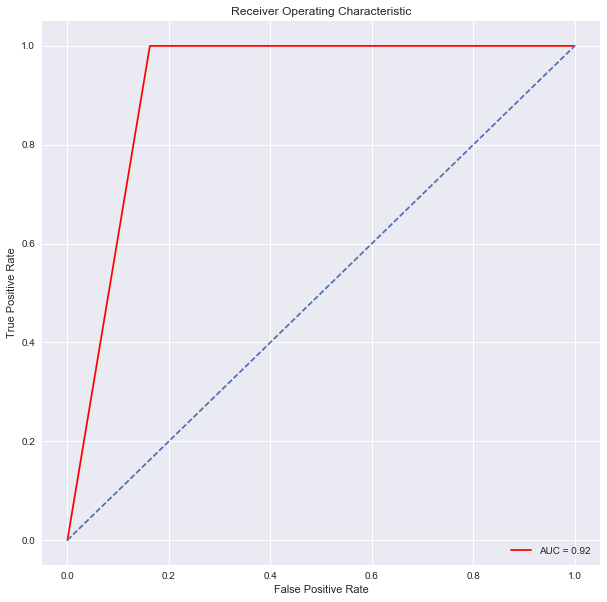

In [466]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

(0, 1)

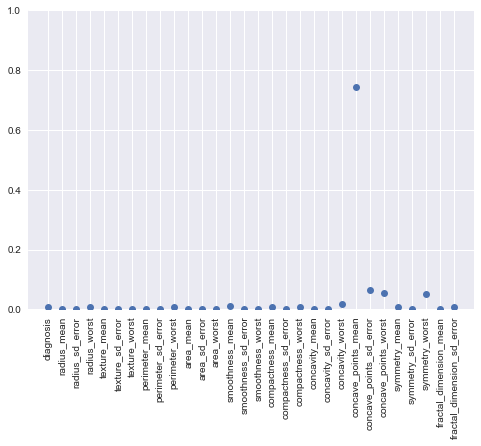

In [483]:
plt.plot(model_tree.feature_importances_, 'o')
plt.xticks(range(30), data.columns , rotation=90)
plt.ylim(0, 1)

** We see for our specific tree, the most important two features are concave_points_mean and symetry_worst.**

# Analysis of PCA

### Performing PCA by taking 8 components with maximum Variance

In [492]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
pca_modified=PCA(n_components=8)
pca_modified.fit_transform(X)

array([[ 6.88657939,  1.70526423, -1.36646507, ...,  0.89014628,
         0.98983174, -0.11769499],
       [ 2.64703036, -3.64670128, -0.40745775, ..., -0.02899186,
         1.27428943, -0.46850289],
       [ 6.09866838, -0.37047397, -0.2674496 , ...,  0.74575032,
        -0.09411332, -0.47244677],
       ..., 
       [ 2.82630762, -2.33321492,  1.54239106, ..., -0.35615597,
         0.2800422 , -0.46219874],
       [ 7.85150737,  1.2536294 ,  0.4285542 , ...,  0.51580101,
         0.38668291,  0.31302458],
       [-6.15720726,  0.12988329,  2.97806057, ...,  1.1048755 ,
         1.04954163, -1.17279966]])

### Splitting the data into training and testing dataset

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_test

array([[ 0.36935303, -0.74928388,  0.44051764, ...,  0.53610515,
         0.55735296,  0.61878325],
       [-0.65722434,  1.07410368, -0.5404399 , ...,  0.18198434,
        -1.4943577 ,  0.95064676],
       [ 1.45163615,  0.00858502,  1.39496282, ...,  1.24434676,
         0.3599375 ,  1.15236772],
       ..., 
       [-1.12674422, -0.02142959, -1.03754677, ...,  1.64707239,
         1.60788522,  1.67944506],
       [ 0.91049459,  0.86400141,  0.95088069, ...,  0.10560534,
        -0.23230888, -0.03843665],
       [-0.83229955,  0.35375304, -0.8585883 , ..., -0.484596  ,
         0.90988056,  0.70337591]])

## Default Logistic Regression

In [494]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [495]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [496]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)

1.0

In [497]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[74,  6],
       [ 1, 33]])

In [498]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9477941176470589

In [499]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.99779411764705883

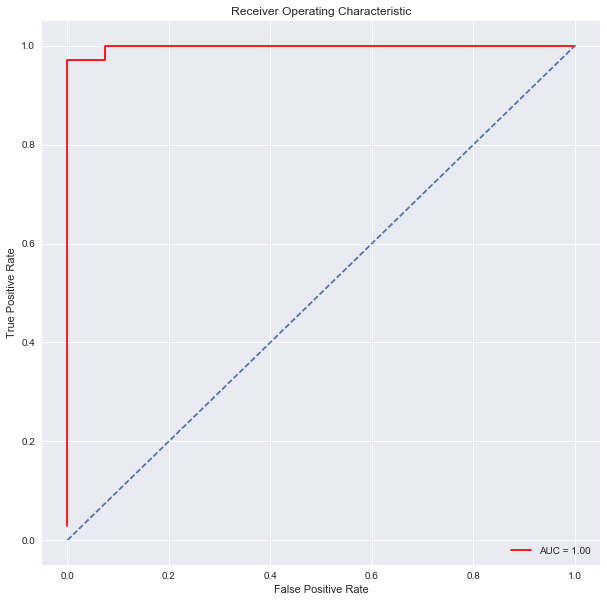

In [500]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**We see a siginificant improvement over the result without using PCA.**

In [501]:
print(model_LR.coef_)


[[ 0.37600954  0.65315344  0.16988268  0.20603178  0.42174747 -1.0318088
   0.80412434  0.94631926  0.00958298  0.32202325  0.89427386 -0.17510172
   0.51793914  0.98456318  0.17180954 -0.74841156 -0.03819229  0.02288531
  -0.57077974 -0.42136247  0.77054307  0.97817552  0.33455825  0.79038773
   0.44680681  0.00864768  1.21031215  0.52541403  0.86307505 -0.01068318]]


**Easy to see the 6th and 27th feature play the most important role.**

# Gaussian Naive Bayes

In [207]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None)

In [208]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)

1.0

In [209]:
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 114 points : 11


In [211]:
scores = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')
print(scores)

[ 0.94827586  0.86206897  0.96491228  0.94736842  0.92982456  0.96491228
  0.9122807   0.96428571  0.91071429  0.94642857]


In [212]:
scores.mean()

0.93510716446288134

In [213]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[70, 10],
       [ 1, 33]])

In [214]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.99      0.88      0.93        80\n          1       0.77      0.97      0.86        34\n\navg / total       0.92      0.90      0.91       114\n'

In [215]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.92279411764705888

In [216]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.98860294117647052

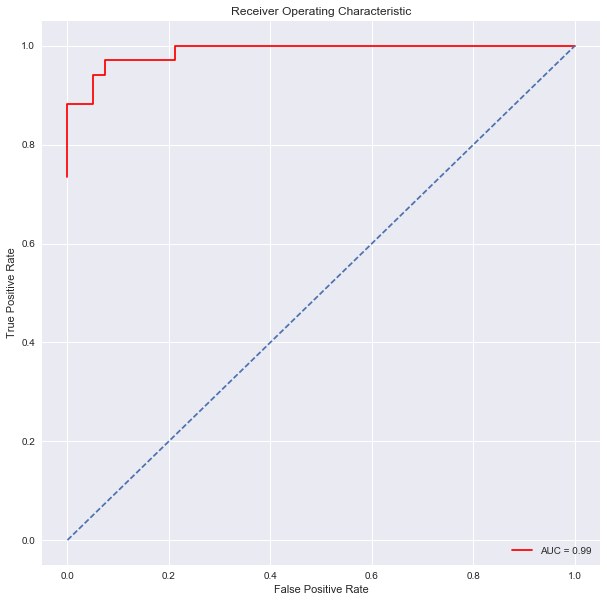

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Support Vector Machine

In [218]:
from sklearn.svm import SVC
svm_model= SVC()

The **gamma** parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The **gamma** parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The **C** parameter trades off misclassification of training examples against simplicity of the decision surface. A low **C** makes the decision surface smooth, while a high **C** aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

# Support Vector Machine without polynomial kernel

In [219]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the tuned_parameter**.The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.
But it is proving computationally expensive here.So I am opting for RandomizedSearchCV.

RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:
1)A budget can be chosen independent of the number of parameters and possible values.
2)Adding parameters that do not influence the performance does not decrease efficiency.

In [220]:
from sklearn.grid_search import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [221]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.978021978022


In [222]:
print(model_svm.grid_scores_)

[mean: 0.97802, std: 0.01391, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}, mean: 0.97802, std: 0.01945, params: {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}, mean: 0.96484, std: 0.01737, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}, mean: 0.97363, std: 0.02713, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}, mean: 0.60879, std: 0.00353, params: {'kernel': 'rbf', 'C': 1, 'gamma': 1}, mean: 0.97363, std: 0.02534, params: {'kernel': 'rbf', 'C': 1000, 'gamma': 0.1}, mean: 0.97143, std: 0.02198, params: {'kernel': 'rbf', 'C': 500, 'gamma': 0.01}, mean: 0.97802, std: 0.01391, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}, mean: 0.90769, std: 0.03957, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}, mean: 0.97363, std: 0.02534, params: {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}, mean: 0.96484, std: 0.01737, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}, mean: 0.97143, std: 0.02198, params: {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}, mean: 0.97143, std: 0.01952, params: 

In [223]:
print(model_svm.best_params_)

{'kernel': 'rbf', 'C': 1, 'gamma': 0.01}


In [224]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.973684210526


In [225]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[77,  3],
       [ 0, 34]])

In [226]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      0.96      0.98        80\n          1       0.92      1.00      0.96        34\n\navg / total       0.98      0.97      0.97       114\n'

In [227]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.98125000000000007

In [228]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.98125000000000007

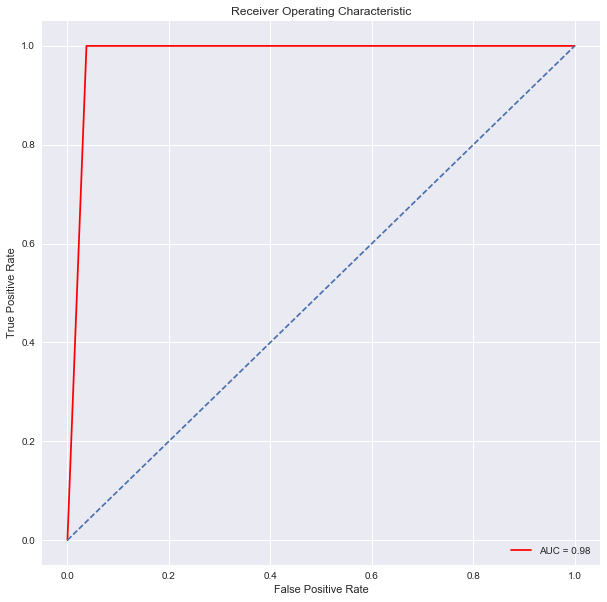

In [229]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Support Vector machine with polynomial Kernel

In [230]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [231]:
from sklearn.grid_search import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [232]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.973626373626


In [233]:
print(model_svm.grid_scores_)

[mean: 0.97363, std: 0.02572, params: {'kernel': 'poly', 'C': 1, 'degree': 3, 'gamma': 0.1}, mean: 0.77363, std: 0.05775, params: {'kernel': 'poly', 'C': 1000, 'degree': 2, 'gamma': 1}, mean: 0.73846, std: 0.03344, params: {'kernel': 'poly', 'C': 100, 'degree': 4, 'gamma': 0.01}, mean: 0.97143, std: 0.02424, params: {'kernel': 'poly', 'C': 500, 'degree': 3, 'gamma': 0.01}, mean: 0.97363, std: 0.02379, params: {'kernel': 'poly', 'C': 500, 'degree': 3, 'gamma': 1}, mean: 0.77363, std: 0.05775, params: {'kernel': 'poly', 'C': 100, 'degree': 2, 'gamma': 1}, mean: 0.62418, std: 0.02024, params: {'kernel': 'poly', 'C': 1, 'degree': 4, 'gamma': 0.01}, mean: 0.60879, std: 0.00353, params: {'kernel': 'poly', 'C': 1000, 'degree': 2, 'gamma': 0.0001}, mean: 0.96923, std: 0.02248, params: {'kernel': 'poly', 'C': 100, 'degree': 3, 'gamma': 0.01}, mean: 0.60879, std: 0.00353, params: {'kernel': 'poly', 'C': 1000, 'degree': 5, 'gamma': 0.001}, mean: 0.71648, std: 0.05640, params: {'kernel': 'poly', '

In [234]:
print(model_svm.best_params_)

{'kernel': 'poly', 'C': 1, 'degree': 3, 'gamma': 0.1}


In [235]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.982456140351


In [236]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[79,  1],
       [ 1, 33]])

In [237]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.99      0.99      0.99        80\n          1       0.97      0.97      0.97        34\n\navg / total       0.98      0.98      0.98       114\n'

In [238]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9790441176470589

In [239]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9790441176470589

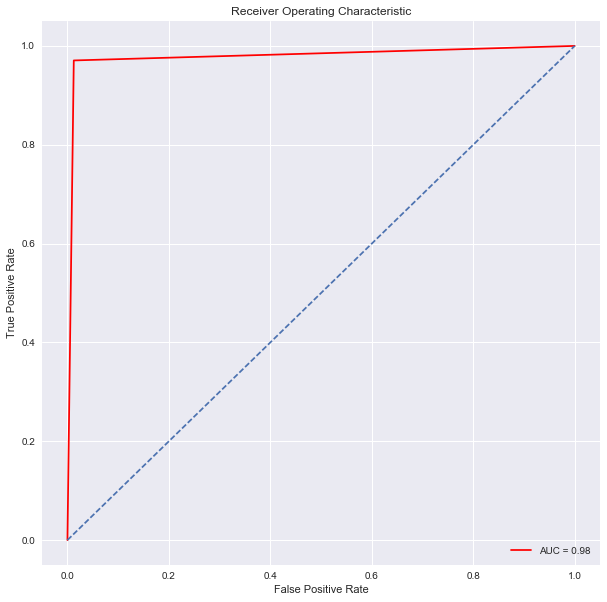

In [240]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

** Clearly we see the tuned model significantly improves on the ROC curve.**

# Random forests

### Trying default model

In [241]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

#tuned_parameters = {'min_samples_leaf': range(5,10,5), 'n_estimators' : range(50,200,50),
                    #'max_depth': range(5,15,5), 'max_features':range(5,20,5)
                    #}

In [242]:
model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [243]:
y_prob = model_RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_RR.score(X_test, y_pred)

1.0

In [244]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[71,  9],
       [ 2, 32]])

In [245]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.97      0.89      0.93        80\n          1       0.78      0.94      0.85        34\n\navg / total       0.92      0.90      0.91       114\n'

In [246]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.91433823529411762

In [399]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

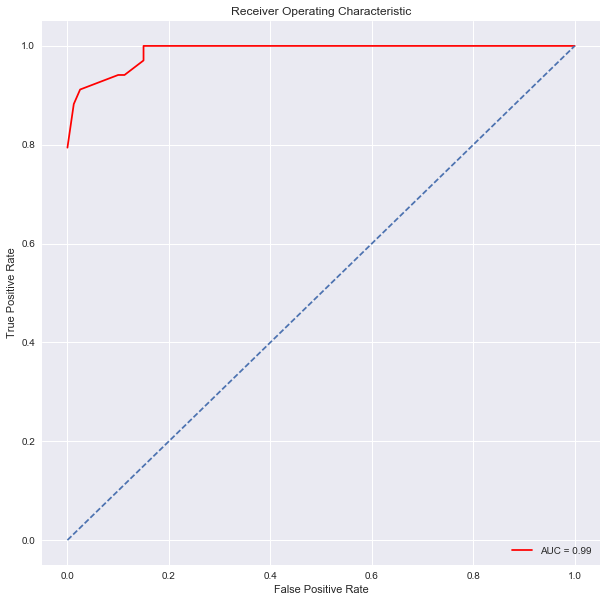

In [248]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**There are 3 features which can be tuned to improve the performance of Random Forest**    

**1) max_features 2) n_estimators  3) min_sample_leaf**

 **A)max_features**: These are the maximum number of features Random Forest is allowed to try in individual tree.
**1)Auto** : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree.
**2)sqrt** : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree.
**3)log2**:It  is another option which takes log to the base 2 of the features input.


**B) n_estimators** : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

**C)min_sample_leaf**:  Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Hence it is important to try different values to get good estimate.

In [249]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [250]:
from sklearn.grid_search import RandomizedSearchCV

RR_model= RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

In [251]:
RR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [252]:
print(RR_model.grid_scores_)

[mean: 0.95604, std: 0.03720, params: {'n_estimators': 20, 'max_features': 'auto', 'min_samples_leaf': 10}, mean: 0.94066, std: 0.04180, params: {'n_estimators': 60, 'max_features': 'log2', 'min_samples_leaf': 60}, mean: 0.93187, std: 0.03733, params: {'n_estimators': 90, 'max_features': 'auto', 'min_samples_leaf': 80}, mean: 0.93846, std: 0.03638, params: {'n_estimators': 60, 'max_features': 'auto', 'min_samples_leaf': 60}, mean: 0.94945, std: 0.02771, params: {'n_estimators': 30, 'max_features': 'log2', 'min_samples_leaf': 50}, mean: 0.93626, std: 0.03830, params: {'n_estimators': 40, 'max_features': 'auto', 'min_samples_leaf': 60}, mean: 0.93187, std: 0.03879, params: {'n_estimators': 30, 'max_features': 'log2', 'min_samples_leaf': 70}, mean: 0.94505, std: 0.03630, params: {'n_estimators': 30, 'max_features': 'sqrt', 'min_samples_leaf': 10}, mean: 0.93407, std: 0.03929, params: {'n_estimators': 70, 'max_features': 'sqrt', 'min_samples_leaf': 90}, mean: 0.95824, std: 0.02749, params:

In [253]:
print(RR_model.best_score_)

0.958241758242


In [254]:
print(RR_model.best_params_)

{'n_estimators': 50, 'max_features': 'sqrt', 'min_samples_leaf': 10}


In [255]:
y_prob = RR_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_test, y_pred)

/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in RandomizedSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


1.0

In [256]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[69, 11],
       [ 1, 33]])

In [257]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.99      0.86      0.92        80\n          1       0.75      0.97      0.85        34\n\navg / total       0.92      0.89      0.90       114\n'

In [258]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9165441176470589

In [259]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9790441176470589

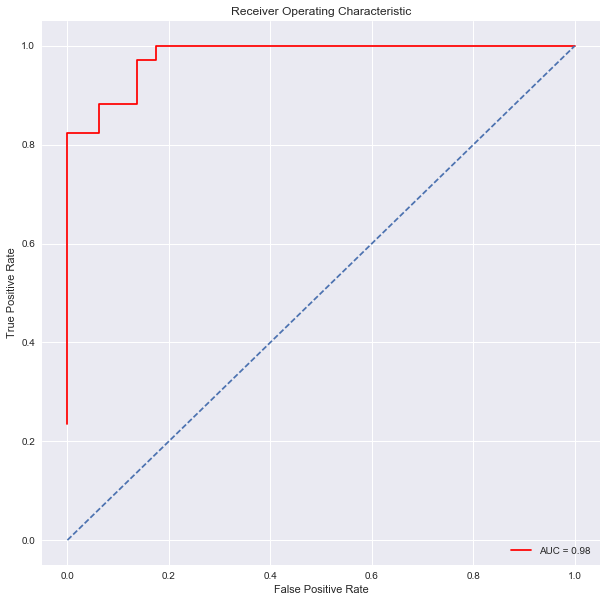

In [260]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Default Decision Tree model

In [400]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [401]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [402]:
y_prob = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_tree.score(X_test, y_pred)

1.0

In [403]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[68, 12],
       [ 0, 34]])

In [404]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      0.85      0.92        80\n          1       0.74      1.00      0.85        34\n\navg / total       0.92      0.89      0.90       114\n'

In [405]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.92499999999999993

In [406]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

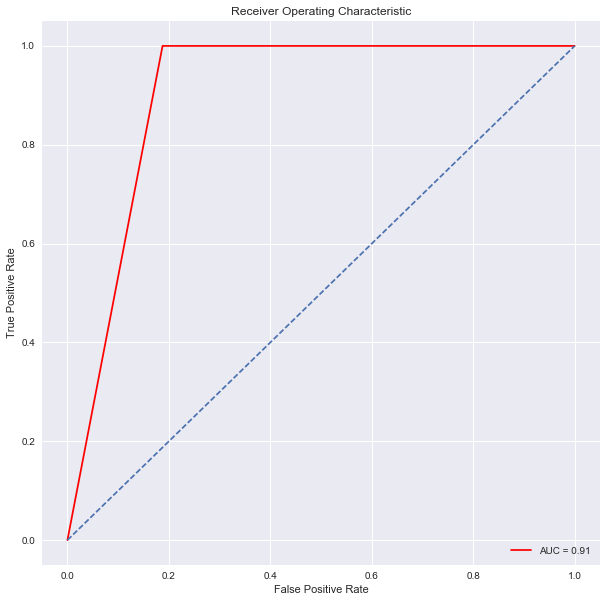

In [268]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Let us tune the hyperparameters of the Decision tree model

**1)Criterion:** Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes.Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes. The details of Gini and entropy needs detail explanation.

2)**max_depth(Maximum depth of tree (vertical depth)):**
Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

**max_features** and **min_samples_leaf** is same as Random Forest classifier

In [269]:
from sklearn.tree import DecisionTreeClassifier

model_DD = DecisionTreeClassifier()


tuned_parameters= {'criterion': ['gini','entropy'], 'max_features': ["auto","sqrt","log2"],
                   'min_samples_leaf': range(1,100,1) , 'max_depth': range(1,50,1)
                  }

In [270]:
from sklearn.grid_search import RandomizedSearchCV
DD_model= RandomizedSearchCV(model_DD, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1,random_state=5)

In [271]:
DD_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], '...75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          scoring='accuracy', verbose=0)

In [272]:
print(DD_model.grid_scores_)

[mean: 0.83297, std: 0.05958, params: {'max_features': 'log2', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 45}, mean: 0.89890, std: 0.06387, params: {'max_features': 'log2', 'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 27}, mean: 0.91429, std: 0.04318, params: {'max_features': 'log2', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 70}, mean: 0.88791, std: 0.06761, params: {'max_features': 'sqrt', 'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 67}, mean: 0.91209, std: 0.04413, params: {'max_features': 'auto', 'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 77}, mean: 0.92527, std: 0.03423, params: {'max_features': 'log2', 'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 10}, mean: 0.89890, std: 0.05140, params: {'max_features': 'sqrt', 'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 76}, mean: 0.86813, std: 0.05962, params: {'max_features': 'log2', 'criterion': 'entropy', 'max_depth': 41, 'min_samp

In [273]:
print(DD_model.best_score_)

0.927472527473


In [274]:
print(DD_model.best_params_)

{'max_features': 'log2', 'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 18}


In [275]:
y_prob = DD_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
DD_model.score(X_test, y_pred)

1.0

In [276]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[69, 11],
       [ 3, 31]])

In [277]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       0.96      0.86      0.91        80\n          1       0.74      0.91      0.82        34\n\navg / total       0.89      0.88      0.88       114\n'

In [278]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.88713235294117654

In [279]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.95992647058823533

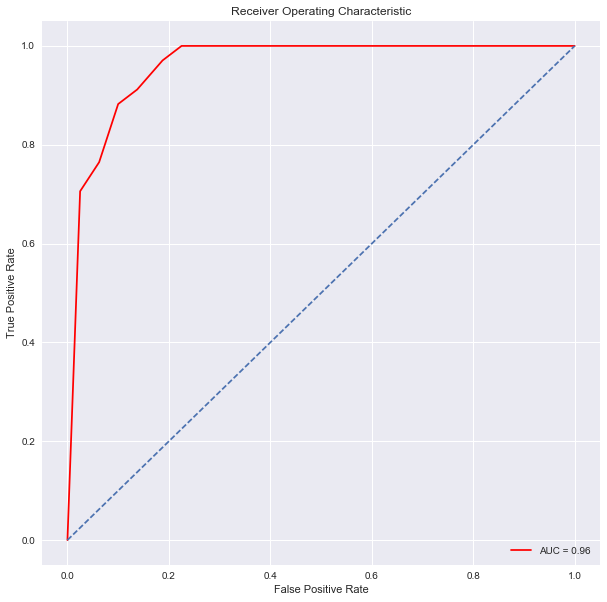

In [280]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

** Similarly, we see significant improvement on ROC curve after fine-tuning the model.

## Neural Network

In [281]:
from sklearn.neural_network import MLPClassifier

In [282]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

/usr/local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [283]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [284]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[73,  7],
       [ 0, 34]])

In [285]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'             precision    recall  f1-score   support\n\n          0       1.00      0.91      0.95        80\n          1       0.83      1.00      0.91        34\n\navg / total       0.95      0.94      0.94       114\n'

In [286]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.95624999999999993

In [287]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.99963235294117647

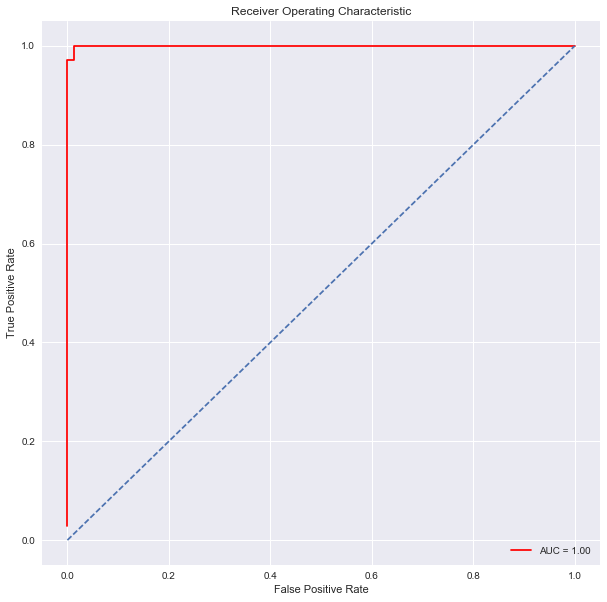

In [288]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Brief summary:



# Evaluation:

To Technical Audiences:
Explain the limitations of your analysis and identify possible further steps you could take.

To Non-Technical Audiences:
Write a short summary of your analysis, explaining how your model works and how it performs.
Briefly explain the factors that contributed to malignant vs benign tumor identification.


### To Technical Audiences:  

In this project, I carried out 6 models: Logistic Regression, Gaussian Naive Bayes, Support Vector Machine, Random Forest Classifier,Decision trees, and Simple neural network. Since this is a simple dataset, all these models achieve great performance: all get the score of 1.0. For more complex dataset, we might see better the difference on the behaviors of the different model.

For most cases, I avoid overfitting by using cross-validation, as well as introducing penalty terms, either L1(lasso) or L2(ridge). For each model, I first implement the default model,and afterward carry out the tuned model by introducing more controlability, which is extremely useful when facing more complex situations. We see for this specific dataset, default models seem perform already pretty well due to the simplicity of our dataset. Nevertheless, parameter tuning still improves some models quite significantly, like the decision tree model, which is well-known to suffer the overfiting issues.

Since there are a lot (30) columns, to improve the model, I also implement PCA first to reduce dimensionality. And this significantly improves the model ROC.

In the end, it seems the logistic regression (penalized) and neural network both achieve the highest performance on ROC curves (area under curve above 0.99). Since logistic regression is a simple and robust model, we want to pick logistic regression among all the 6 models I carried out.



### To Non-Technical Audiences:  

In this project, I carried out 6 models: Logistic Regression, Gaussian Naive Bayes, Support Vector Machine, Random Forest Classifier,Decision trees, and Simple neural network. Since this is a simple dataset, all these models achieve great performance: all get the score of 1.0. For more complex dataset, we might see better the difference on the behaviors of the different model.

We can see several features are important on identifying tumor being malignant or benign, such as mean concave points, worst concanve points, and worst perimeter. 


